In [1]:
import pickle
import gzip
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time

### Loading of the data

In [4]:
start = time.time()
#Inselspital
%ls -lh /home/dueo/data/Inselspital_2015_07_08/
with open('/home/dueo/data/Inselspital_2015_07_08/META.pickle') as f:
    Names,X,Y,l = pickle.load(f)
print ("Loaded data in " + str(time.time() - start))
print ("   " + str(X.shape) + " y " + str(Y.shape) + " " + str(np.max(Y)))
np.histogram(Y, bins=[0, 1, 2, 3,4,5,6])

total 3.1G
drwxr-xr-x 62 dueo dueo  4.0K Jun  5 04:43 GBM/
-r--r--r--  1 dueo dueo  1.1G Jul 16 17:31 GBM.pickle
-rw-r--r--  1 dueo dueo  9.1M Jul 17 16:12 GBM_sub.pickle
-rw-r--r--  1 dueo dueo  8.9M Jul 17 20:04 GBM_tumors.pickle
-rw-r--r--  1 dueo dueo  509M Jun 18 16:22 GBM.zip
-rw-r--r--  1 dueo dueo  269K Jun 23 13:05 list_GBM.txt
-rw-r--r--  1 dueo dueo  282K Jun 23 13:07 list_meta.txt
-r--r--r--  1 dueo dueo 1003M Jul 17 14:01 META.pickle
drwxr-xr-x 68 dueo dueo  4.0K Jun  5 05:26 metastasis/
-rw-r--r--  1 dueo dueo  455M Jun 18 16:21 metastasis.zip
-rw-r--r--  1 dueo dueo  9.1M Jul 17 16:12 META_sub.pickle
Loaded data in 1.94321990013
   (1002, 1, 256, 256) y (1002, 1, 256, 256) 3.0


(array([64990823,    69261,        0,   606988,        0,        0]),
 array([0, 1, 2, 3, 4, 5, 6]))

In [5]:
start = time.time()
with open('/home/dueo/data/Inselspital_2015_07_08/META.pickle') as f:
    Names_M,X_M,Y_M,l_M = pickle.load(f)
print ("Loaded data in " + str(time.time() - start))
print ("   " + str(X_M.shape) + " y " + str(Y_M.shape) + " " + str(np.max(Y_M)))
np.histogram(Y_M, bins=[0, 1, 2, 3,4,5,6])

Loaded data in 1.46956300735
   (1002, 1, 256, 256) y (1002, 1, 256, 256) 3.0


(array([64990823,    69261,        0,   606988,        0,        0]),
 array([0, 1, 2, 3, 4, 5, 6]))

### Comparison with the image send by Johannes
Here the image send from Johannes. It seems that the slice is the slice numbered 12.


<img src="TEST-CASE.png", width=800>

In [7]:
idx = 21
Names[idx]

'HLTOCDW43KIS7GIQIEQUSKHOUM======_ep2d_diff_3scan_trace_p3_ADC_3_15.dcm'

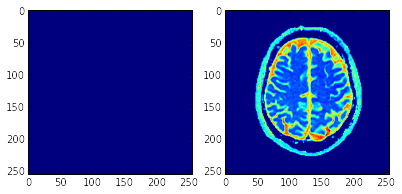

In [8]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplot(131)
plt.imshow(Y[idx,0,:,:])
plt.subplot(132)
plt.imshow(X[idx,0,:,:])

In [9]:
Y[idx,0,100,100] #2 The big thing is a tumor
Y[idx,0,100,160] #1 The small thing is normal tissue
np.max(Y)

3.0

1.0

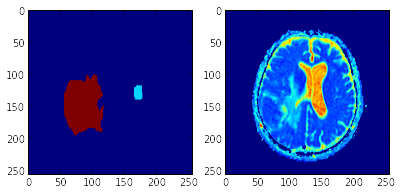

In [10]:
import pylab
idx = 46
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplot(131)
plt.imshow(Y_M[idx,0,:,:])
plt.subplot(132)
plt.imshow(X_M[idx,0,:,:])
Y_M[idx,0,130,75]  #3 The big one
Y_M[idx,0,130,170] #1 The small one (is also 1 just differnent color dueo to scaling teh color scale)

### Annotation
The Questions remains, how Johannes annotates the *normal tissue* is this some 'super normal' tissue? 

#### Creation of a subsampled data set

In [11]:
idx_Y = []
for i in range(0,len(Y)):
    if (np.sum(Y[1,0,:,:] == 2) > 1000):
        idx_Y.append(i)        

idx_Y_M = []
for i in range(0,len(Y_M)):
    if (np.sum(Y_M[1,0,:,:] == 3) > 1000):
        idx_Y_M.append(i)        

In [12]:
idx_Y = idx_Y[0:10]
idx_Y_M = idx_Y_M[0:10]
idx_Y_M

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
with open('META_sub.pickle', 'wb') as f:
    pickle.dump((Names_M[0:30],X_M[0:30,:,:,:],Y_M[0:30,:,:,:],l_M[0:30]), f, -1)
%ls -rtlh

total 49M
-rw-r--r-- 1 dueo dueo    19 Mar 27 21:19 __init__.py
-rw-r--r-- 1 dueo dueo   758 Mar 27 21:19 CreateMatLabConversionCode.R
-rw-r--r-- 1 dueo dueo  1.9K Mar 27 21:19 create_data.py
-rw-r--r-- 1 dueo dueo  164K Apr  2 00:37 training_net1.png
drwxr-xr-x 2 dueo dueo  4.0K Apr  2 01:45 data/
-rw-r--r-- 1 dueo dueo 1009K Apr  2 11:18 creation_of_data.ipynb
-rw-r--r-- 1 dueo dueo  5.2K Apr  2 14:06 FirstTry.py
-rw-r--r-- 1 dueo dueo  4.8K Apr  2 19:13 FirstTry.pyc
-rw-r--r-- 1 dueo dueo  179K Apr  2 19:30 dumm.png
-rw-r--r-- 1 dueo dueo  1.4M Apr  2 20:21 pred.png
drwxr-xr-x 3 dueo dueo  4.0K Jun 23 18:35 MRIManualSegmentation/
-rw-r--r-- 1 dueo dueo  2.0K Jul 16 18:49 Untitled.ipynb
-rw-r--r-- 1 dueo dueo  227K Jul 17 11:37 TEST-CASE.png
-rw-r--r-- 1 dueo dueo   77K Jul 17 12:23 FirstNet_Johannes.ipynb
-rw-r--r-- 1 dueo dueo  6.2M Jul 17 19:52 FirstNet.ipynb
-rw-r--r-- 1 dueo dueo   27K Jul 17 19:52 creation_of_data_inselspital.ipynb
-rw-r--r-- 1 dueo dueo  9.1M Jul 17 19:53 GBM_

In [61]:
with open('GBM_sub.pickle', 'wb') as f:
    pickle.dump((Names[0:9],X[0:9,:,:,:],Y[0:9,:,:,:],l[0:9]), f, -1)

In [62]:
%ls -lh /home/dueo/data/Inselspital_2015_07_08/

total 3.1G
drwxr-xr-x 62 dueo dueo  4.0K Jun  5 04:43 GBM/
-r--r--r--  1 dueo dueo  1.1G Jul 16 17:31 GBM.pickle
-rw-r--r--  1 dueo dueo  9.1M Jul 17 16:12 GBM_sub.pickle
-rw-r--r--  1 dueo dueo  509M Jun 18 16:22 GBM.zip
-rw-r--r--  1 dueo dueo  269K Jun 23 13:05 list_GBM.txt
-rw-r--r--  1 dueo dueo  282K Jun 23 13:07 list_meta.txt
-r--r--r--  1 dueo dueo 1003M Jul 17 14:01 META.pickle
drwxr-xr-x 68 dueo dueo  4.0K Jun  5 05:26 metastasis/
-rw-r--r--  1 dueo dueo  455M Jun 18 16:21 metastasis.zip
-rw-r--r--  1 dueo dueo  9.1M Jul 17 16:12 META_sub.pickle
